In [1]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.ticker as ticker
from collections import OrderedDict
from scipy import stats
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)

# Here are my rc parameters for matplotlib
fsize = 10
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': fsize})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 2000
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5
# Set x tick params
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.minor.width'] = 1.25
# Set y tick params
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.minor.width'] = 1.25
# Load LaTeX and amsmath
# mpl.rc('text', usetex=True)
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
os.chdir(parent)

# Grab file names from data folder
dens = os.listdir('../densities')
try:
    data.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

# Grab the MCS data
pres = os.listdir('../pressures')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

.DS_Store not in directory
.DS_Store not in directory


In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in xrange(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
            for j in xrange(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "ep", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("ep")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_dens = []
os.chdir(parent)
os.chdir('../densities')
for i in dens:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_dens.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_dens[0])

,Timestep,Gas-r=1.0,Liq-r=1.0,Gas-r=1.5,Liq-r=1.5,Gas-r=2.0,Liq-r=2.0,Gas-r=2.5,Liq-r=2.5,Gas-r=3.0,Liq-r=3.0,Gas-r=3.5,Liq-r=3.5,Gas-r=4.0,Liq-r=4.0,Gas-r=4.5,Liq-r=4.5,Gas-r=5.0,Liq-r=5.0
0,10.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.420,0.455
1,20.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
2,30.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.43,0.455,0.420,0.455
3,40.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
4,50.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.420,0.455
5,60.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
6,70.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
7,80.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
8,90.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.430,0.455
9,100.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455


In [5]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "ep", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("ep")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres = []
os.chdir(parent)
os.chdir('../pressures')
for i in pres:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres[-1])

,Timestep,gasArea,gasTrace,gasPress,bulkArea,bulkTrace,bulkPress,SurfaceTense,Length
0,100.0,89356.567,432932.609,4.845,28214.2,2.821958e+08,10001.906,7568634.413,757.1


In [6]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in range(0, len(all_dens)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("ep")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,50,0,100.0,0.0001,45.0,0.000001
1,0,50,0,100.0,0.0010,45.0,0.000001
2,0,50,0,100.0,0.0100,45.0,0.000001
3,0,50,0,100.0,0.1000,45.0,0.000001
4,0,50,0,100.0,1.0000,45.0,0.000001
...,...,...,...,...,...,...,...
126,0,500,0,100.0,0.0100,55.0,0.000001
127,0,500,0,100.0,1.0000,55.0,0.000001
128,0,500,0,100.0,0.0001,65.0,0.000001
129,0,500,0,100.0,0.0100,65.0,0.000001


In [7]:
# Let's add columns to the time-resolved simulation data
for i in xrange(len(all_dens)):
    # Ger rid of NaN in favor of 0
    all_dens[i].fillna(0, inplace=True)

headers=list(all_dens[0])
display(all_dens[0])
print(all_dens[0][headers[1]][0])
print(all_dens[0][headers[2]][0])

,Timestep,Gas-r=1.0,Liq-r=1.0,Gas-r=1.5,Liq-r=1.5,Gas-r=2.0,Liq-r=2.0,Gas-r=2.5,Liq-r=2.5,Gas-r=3.0,Liq-r=3.0,Gas-r=3.5,Liq-r=3.5,Gas-r=4.0,Liq-r=4.0,Gas-r=4.5,Liq-r=4.5,Gas-r=5.0,Liq-r=5.0
0,10.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.420,0.455
1,20.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
2,30.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.43,0.455,0.420,0.455
3,40.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
4,50.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.420,0.455
5,60.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
6,70.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
7,80.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
8,90.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.430,0.455
9,100.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455


0.25
0.5


In [8]:
# All data is loaded, now compute analytical aspects
r_cut = (2.**(1./6.))

# Get lattice spacing for particle size
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / r) * ((2*(div**12)) - (div)**6)
    return dU

# Lennard-Jones pressure
def ljPress(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / r) * ((2.*(div**12.)) - (div)**6.)
    # This is just pressure divided by the area of a particle
    return (12. * dU / (np.pi * r))
    
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
    return (magnitude * (pe**power)) / (np.pi)
    
def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out
    
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

# From area fraction, get lattice spacing
def phiToLat(phiIn):
    '''Read in phi, output the lattice spacing'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)
    
def compPhiG(pe, a, kap=4.05, sig=1.):
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    return num / den
    
def clustFrac(phi, phiG, a, sig=1.):
    phiL = latToPhi(a)
    ApL = np.pi * (sig**2) / 4.
    Ap = np.pi * (sig**2) / 4.
    num = (phiL*phiG) - (phiL*phi)
    den = ((ApL/Ap)*phi*phiG) - (phi*phiL)
    ans = num / den
    return ans

def radCurve(area):
    # From area of circle get curvature
    return np.sqrt(area/np.pi)

def radCirc(circ):
    return circ / (2. * np.pi)

In [9]:
# Let's use analytical theory and kinetic theory to get cluster radius
epsRange = [1., 0.1, 0.01, 0.001, 0.0001]
# epsRange = [0.0001, 0.001, 0.01, 0.1, 1.]
peRange = np.arange(0., 700., 1.)
phiRange = [0.45, 0.55, 0.65]
N = 100000.
norm = 10.**0.
# norm = 1.

phiCP = np.pi / (2. * np.sqrt(3))
lat = []
pColl = []
pLJ = []
cfs = []
Rls = []
peCrit = []
phiGs = []
phiCPs = []
a_box = []
l_box = []
for b in range(0, len(phiRange)):
    lat.append([])
    phiCPs.append([])
    pColl.append([])
    pLJ.append([])
    cfs.append([])
    Rls.append([])
    phiGs.append([])
    peCrit.append([])
    a_box.append(N * np.pi * 0.25 / phiRange[b])
    l_box.append(np.sqrt(a_box[-1]))
    for i in range(0, len(epsRange)):
        lat[b].append([])
        phiCPs[b].append([])
        pColl[b].append([])
        pLJ[b].append([])
        cfs[b].append([])
        Rls[b].append([])
        phiGs[b].append([])
        for j in range(0, len(peRange)):
            # Compute lattice spacing
            lat[b][i].append(conForRClust(peRange[j], epsRange[i]))
            phiCPs[b][i].append(latToPhi(lat[b][i][-1]))
            # Compute pressure
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP)
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP * (lat[b][i][-1]**(0.5)) * 1.25)
            curPLJ = ljPress(lat[b][i][-1], epsRange[i])
            # Append to list
            pLJ[b][i].append(curPLJ/(norm))

            # Compute cluster fraction
            phiG = compPhiG(peRange[j], lat[b][i][-1])
            phiGs[b][i].append(phiG)
            if peRange[j] > 35.:
                cf = clustFrac(phiRange[b], phiG, lat[b][i][-1])
                if cf < 0. or cf > 1.:
                    cf = 0.
            else:
                cf = 0
            cfs[b][i].append(cf)

            # Get the critical activity
            if j > 0:
                if cfs[b][i][-2] == 0. and cfs[b][i][-1] > 0.:
                    peCrit[b].append(peRange[j])

            # Get the radius (for some N)
            Nl = cfs[b][i][-1] * N
            Al = Nl * (np.pi * (lat[b][i][-1]**2) * 0.25)
            Rl = np.sqrt(Al / np.pi)
            Rls[b][i].append(Rl)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in double_scalars


In [10]:
# Compute the dense phase radius from the area of the dense phase
ind = "bulkArea"
curv = []
sim_l_box = []
for i in range(0, len(all_pres)):
    sim_a_box = N * np.pi * 0.25 / (params['phi'][i] / 100.)
    sim_l_box.append(np.sqrt(sim_a_box))
    # If the dense phase exists
    if not all_pres[i].empty:
        curv.append(radCurve(all_pres[i][ind].iloc[-1]))
    # If not...
    elif all_pres[i].empty:
        curv.append(0.)
        

In [11]:
# Setting a constant index for phi to use in kinetic theory
constPhi = 0.65
phiInd = phiRange.index(constPhi)

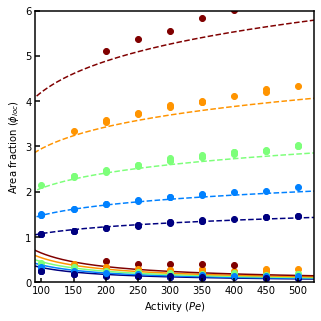

In [12]:
# Let's plot the phi relationship for analytical data
fig = plt.figure(figsize=(5, 5))

for i in range(0, len(epsRange)):
    plt.plot(peRange, phiCPs[phiInd][i], c=plt.cm.jet(float(i)/(len(epsRange)-1)), 
             lw=1.5, ls='--', zorder=0)
#     plt.plot(peRange+peCrit[i], phiCPs[i], c=plt.cm.jet(float(i)/(len(epsRange)-1)), 
#              lw=1.5, ls='--')
    plt.plot(peRange, phiGs[phiInd][i], c=plt.cm.jet(float(i)/(len(epsRange)-1)),
             lw=1.5, zorder=0)
#     plt.axvline(peCrit[i], c=plt.cm.jet(float(i)/(len(epsRange)-1)),
#                 lw=1.5, ls=':')

# Overlay the simulation data
GAS="Gas-r=5.0"
LIQ="Liq-r=5.0"
for i in range(0, len(all_dens)):
    # Don't plot non-phase-separated data
    if all_dens[i][LIQ].iloc[-1] < 0.75:
        continue
    plt.scatter(params['peA'][i], all_dens[i][LIQ].iloc[-1],
                c=plt.cm.jet(float(epsRange.index(params['eps'][i]))/(len(epsRange)-1)) )
    plt.scatter(params['peA'][i], all_dens[i][GAS].iloc[-1],
            c=plt.cm.jet(float(epsRange.index(params['eps'][i]))/(len(epsRange)-1)) )
    
plt.xlim(90, 525)
plt.ylim(0, 6)
plt.xlabel(r'Activity $(Pe)$')
plt.ylabel(r'Area fraction $(\phi_{loc})$')
plt.show()


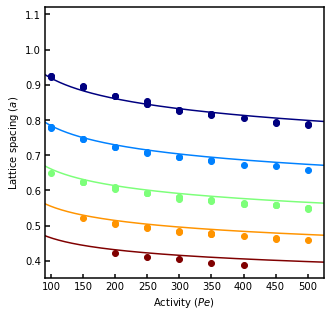

In [13]:
# Let's plot the lattice spacing
fig = plt.figure(figsize=(5, 5))

for i in range(0, len(epsRange)):
    plt.plot(peRange, lat[phiInd][i], c=plt.cm.jet(float(i)/(len(epsRange)-1)),
             lw=1.5)
    
# Overlay the simulation data
for i in range(0, len(all_dens)):
    # Don't plot non-phase-separated data
    if all_dens[i][LIQ].iloc[-1] < 0.75:
        continue
    plt.scatter(params['peA'][i], phiToLat(all_dens[i][LIQ].iloc[-1]),
                c=plt.cm.jet(float(epsRange.index(params['eps'][i]))/(len(epsRange)-1)) )

plt.xlim(90, 525)
plt.ylim(0.35, r_cut)
plt.xlabel(r'Activity $(Pe)$')
plt.ylabel(r'Lattice spacing $(a)$')
plt.show()

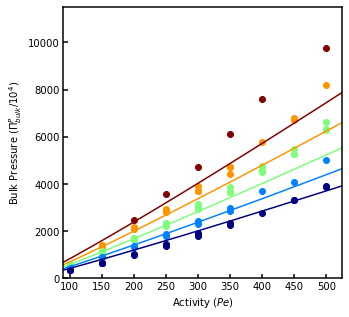

In [14]:
# Let's plot this for pressure (compared with pair force pressure)
fig = plt.figure(figsize=(5, 5))

for i in range(0, len(epsRange)):
    plt.plot(peRange, pLJ[phiInd][i], c=plt.cm.jet(float(i)/(len(epsRange)-1)),
             lw=1.5)
# Overlay the simulation pressure data
for i in range(0, len(all_pres)):
    # Don't plot non-phase-separated data
    if all_pres[i].empty:
        continue
    plt.scatter(params['peA'][i], all_pres[i]['bulkPress'] / (2.*norm),
                c=plt.cm.jet(float(epsRange.index(params['eps'][i]))/(len(epsRange)-1)) )

plt.xlim(90, 525)
plt.ylim(0, )
plt.xlabel(r'Activity $(Pe)$')
plt.ylabel(r'Bulk Pressure $(\Pi^{P}_{bulk}/10^{4})$')
plt.show()

[100 150 200 250 300 350 400 450 500]


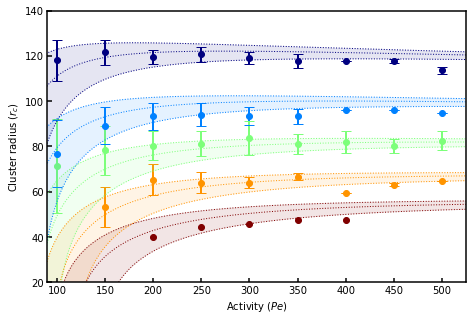

In [15]:
# Compute the average of your two radius methods
fig = plt.figure(figsize=(7.5, 5))

phiShapes = ['o', '*', 'd']

avg_rad = []
for i in range(0, len(all_pres)):
    # Don't plot non-phase-separated data
    if all_pres[i].empty:
        avg_rad.append(0.)
        continue
    fromCirc = radCirc(all_pres[i]['Length'].iloc[-1])
    
    # We need to average are radius computation for small clusters
    if params['eps'][i] >= 0.1:
        avg_rad.append(curv[i])
    else:
        avg_rad.append((curv[i] + fromCirc) / 2)
        
    if params['peA'][i] == 500 and params['eps'][i] == 10**-4:
        continue
    if (params['peA'][i] == 300 or params['peA'][i] == 350) and params['eps'][i] == 0.001 and params['phi'][i] == 45:
        continue
#     plt.scatter(params['peA'][i], avg_rad[-1],
#                 c=plt.cm.jet(float(epsRange.index(params['eps'][i]))/(len(epsRange)-1)),
#                 marker=phiShapes[phiRange.index(params['phi'][i]/100.)])
    
# Compute the average radius at constant activity and epsilon
constPes = np.arange(100, 550, 50)
print(constPes)
sumR = []
nForR = []
for i in range(0, len(epsRange)):
    sumR.append([])
    nForR.append([])
    for j in range(0, len(constPes)):
        sumR[i].append(0.)
        nForR[i].append(0.)
        for k in range(0, len(all_pres)):
            # Toss out non-ps data
            if all_pres[k].empty:
                continue       
            # Statistical outliers                            
            if params['peA'][k] == 500 and params['eps'][k] == 10**-4:
                continue
            if (params['peA'][k] == 300 or params['peA'][k] == 350) and params['eps'][k] == 0.001 and params['phi'][k] == 45:
                continue                                                      
            # Check if values match
            if params['eps'][k] == epsRange[i] and params['peA'][k] == constPes[j]:
                sumR[i][j] += avg_rad[k]
                nForR[i][j] += 1
                
# Get the average
avgR = []
for i in range(0, len(epsRange)):
    avgR.append([])
    for j in range(0, len(constPes)):
        avgR[i].append(0.)
        if nForR[i][j] >= 1:
            avgR[i][j] += (sumR[i][j] / nForR[i][j])
            plt.scatter(constPes[j], avgR[i][j], zorder=1,
                        c=plt.cm.jet(float(i)/(len(epsRange)-1)))

# Standard deviation
stdDev = []
for i in range(0, len(epsRange)):
    stdDev.append([])
    for j in range(0, len(constPes)):
        stdDev[i].append(0.)
        for k in range(0, len(all_pres)):
            # Toss out non-ps data
            if all_pres[k].empty:
                continue       
            # Statistical outliers                            
            if params['peA'][k] == 500 and params['eps'][k] == 10**-4:
                continue
            if (params['peA'][k] == 300 or params['peA'][k] == 350) and params['eps'][k] == 0.001 and params['phi'][k] == 45:
                continue                                                      
            # Check if values match
            if params['eps'][k] == epsRange[i] and params['peA'][k] == constPes[j]:
                stdDev[i][j] += ((avg_rad[k] - avgR[i][j])**2)
                
for i in range(0, len(epsRange)):
    for j in range(0, len(constPes)):
        if nForR[i][j] >= 1:
            stdDev[i][j] /= nForR[i][j]
            stdDev[i][j] = np.sqrt(stdDev[i][j])
            if epsRange[i] == 0.0001:
                continue
            plt.errorbar(constPes[j], avgR[i][j], stdDev[i][j], zorder=0,
                         c=plt.cm.jet(float(i)/(len(epsRange)-1)),
                         capsize=5, elinewidth=2.)
            
# ax.errorbar(params['peA'][k],
# avg[j][i],
# sd[j][i],
# capsize=5,
# c=cols[distPhi.index(params['phi'][k])],
# elinewidth=2.0,
# zorder=denses.index(params['phi'][k]))



# # Let's compare the two methods of computing the radius
# for i in range(0, len(all_pres)):
#     # Don't plot non-phase-separated data
#     if all_pres[i].empty:
#         continue
# #     if params['phi'][i] == 65:
#     plt.scatter(params['peA'][i], curv[i],
#                 c=plt.cm.jet(float(epsRange.index(params['eps'][i]))/(len(epsRange)-1)))
        
# for i in range(0, len(all_pres)):
#     # Don't plot non-phase-separated data
#     if all_pres[i].empty:
#         continue
#     if params['phi'][i] == 65:
#         plt.scatter(params['peA'][i], radCirc(all_pres[i]['Length']),
#                     c=plt.cm.jet(float(epsRange.index(params['eps'][i]))/(len(epsRange)-1)),
#                     marker='D') 

# phiLS = ['--', ':', '-.']
# for c in range(0, len(phiRange)):
#     for i in range(0, len(epsRange)):
#         plt.plot(peRange, Rls[c][i],
#                  c=plt.cm.jet(float(i)/(len(epsRange)-1)),
#                  ls=phiLS[c], lw=1.)
        
phiLS = ['--', ':', '-.']
for c in range(0, len(phiRange)):
    for i in range(0, len(epsRange)):
        plt.plot(peRange, Rls[c][i],
                 c=plt.cm.jet(float(i)/(len(epsRange)-1)),
                 ls=':', lw=1.)
        
fillPhi = [0.45, 0.65]
for i in range(0, len(epsRange)):
    plt.fill_between(peRange, Rls[0][i], Rls[2][i],
                     color=plt.cm.jet(float(i)/(len(epsRange)-1)),
                     linestyle=':', lw=1., alpha=0.1)
    
plt.xlim(90, 525) 
plt.ylim(20, 140)
plt.ylabel(r'Cluster radius $(r_{c})$')
plt.xlabel(r'Activity $(Pe)$')
plt.show()

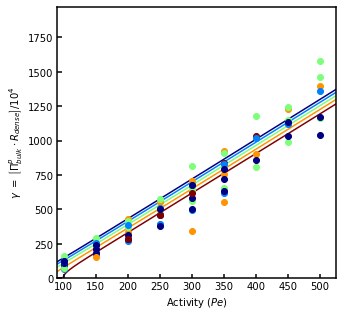

In [16]:
# Let's show analytical surface tension with data overlaid
fig = plt.figure(figsize=(5, 5))

# Plot the analytical component
sts = []
for i in range(0, len(epsRange)):
    st = [a * b for a, b in zip(pLJ[phiInd][i], Rls[phiInd][i])]
    st /= l_box[phiInd]
#     st = [ i / l_box[phiInd] for i in st ]
    sts.append(st)
    plt.plot(peRange, st, c=plt.cm.jet(float(i)/(len(epsRange)-1)),
             lw=1.5, zorder=0, label=epsRange[i])
    
# Overlay simulation data
for i in range(0, len(all_pres)):
    # Don't plot non-phase-separated data
    if all_pres[i].empty or params['eps'][i] < 0.00001:
        continue
    y = (all_pres[i]['bulkPress'].iloc[-1]) * (avg_rad[i]) / ((2.*norm) * sim_l_box[i])
    if params['peA'][i] == 500 and params['eps'][i] <= 0.0001:
        continue
    plt.scatter(params['peA'][i], y,
                c=plt.cm.jet(float(epsRange.index(params['eps'][i]))/(len(epsRange)-1)) )
#     plt.scatter(params['peA'][i], 
#                 all_pres[i]['bulkPress'] / (2.*norm) * ((radCirc(all_pres[i]['Length'])),
#                 c=plt.cm.jet(float(epsRange.index(params['eps'][i]))/(len(epsRange)-1)) )
#     plt.scatter(params['peA'][i], 
#                 all_pres[i]['bulkPress'] / (2.*norm) * ((radCirc(all_pres[i]['Length']) + curv[i])/2.),
#                 c=plt.cm.jet(float(epsRange.index(params['eps'][i]))/(len(epsRange)-1)) )
    

plt.xlim(90, 525)
plt.ylim(0, )
plt.xlabel(r'Activity $(Pe)$')
plt.ylabel(r'$\gamma \ = \ \left[\Pi^{p}_{bulk} \cdot R_{dense}\right]/10^{4}$')
plt.show()

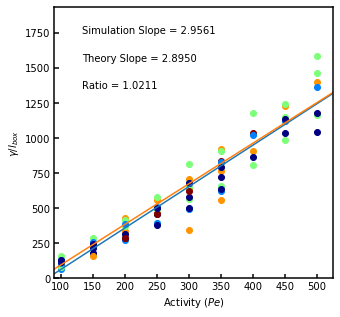

In [17]:
# Fit a line to simulation surface tension data
fig = plt.figure(figsize=(5, 5))

fitPe = []
fitST = []
for i in range(0, len(all_pres)):
    # Don't plot non-phase-separated data
    if all_pres[i].empty:
        continue
    y = (all_pres[i]['bulkPress'].iloc[-1]) / (2.*norm) * (avg_rad[i]) / sim_l_box[i]
    # This data point is a statistical outlier
    if params['peA'][i] == 500 and params['eps'][i] <= 0.0001:
        continue
    # Gather data to compute fit
    fitPe.append(params['peA'][i])
    fitST.append(y)
    plt.scatter(params['peA'][i], y,
                c=plt.cm.jet(float(epsRange.index(params['eps'][i]))/(len(epsRange)-1)) )
    
# Now do a linear regression
datm, datb, datr, datp, dats = stats.linregress(fitPe, fitST)
def lineFit(x, m, b):
    return (m*x) + b
plt.plot(peRange, lineFit(peRange, datm, datb))
ax = plt.gca()
plt.text(x=0.1, y=0.9, s='Simulation Slope = ' + "{:0.4f}".format(datm), transform=ax.transAxes)
plt.xlim(90, 525)
plt.ylim(0, )

# Fit the linear portion of the theory as well
fitPeTheory = []
fitSTTheory = []
for i in range(0, len(epsRange)):
    for j in range(0, len(peRange)):
        if peRange[j] > 200.:
            fitPeTheory.append(peRange[j])
            fitSTTheory.append(sts[i][j])
theorym, theoryb, theoryr, theoryp, theorys = stats.linregress(fitPeTheory, fitSTTheory)
plt.plot(peRange, lineFit(peRange, theorym, theoryb))
plt.text(x=0.1, y=0.8, s='Theory Slope = ' + "{:0.4f}".format(theorym), transform=ax.transAxes)
plt.text(x=0.1, y=0.7, s=r'Ratio = ' + "{:0.4f}".format(datm/theorym), transform=ax.transAxes)
   
plt.xlabel(r'Activity $(Pe)$')
plt.ylabel(r'$\gamma / l_{box}$')
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


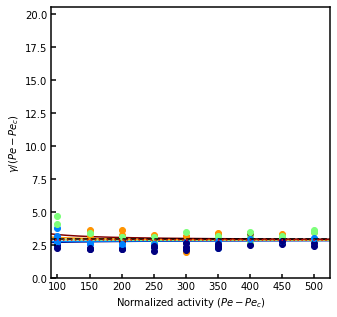

In [18]:
# Plot the gamma / (pe-pe_c) vs (pe-pe_c)
fig = plt.figure(figsize=(5, 5))

# Plot the analytical component
c = phiInd
# for c in range(0, len(phiRange)):
for i in range(0, len(epsRange)):
    stNorm = [a / (b - peCrit[c][i]) for a, b in zip(sts[i], peRange)]
    plt.plot(peRange - peCrit[c][i], stNorm, c=plt.cm.jet(float(i)/(len(epsRange)-1)),
             lw=1.5, zorder=0, label=epsRange[i])
    
# Overlay simulation data
for i in range(0, len(all_pres)):
    # Don't plot non-phase-separated data
    if all_pres[i].empty or params['eps'][i] < 0.00001:
        continue
    x = params['peA'][i] - peCrit[phiRange.index(params['phi'][i]/100.)][epsRange.index(params['eps'][i])]
    y = (all_pres[i]['bulkPress'].iloc[-1]) / (2.*norm) * (avg_rad[i]) / x / sim_l_box[i]
    if params['peA'][i] == 500 and params['eps'][i] <= 0.0001:
        continue
    plt.scatter(params['peA'][i], y,
                c=plt.cm.jet(float(epsRange.index(params['eps'][i]))/(len(epsRange)-1)) )
    
plt.axhline(datm, ls='--', c='k', lw=1.5)
plt.axhline(theorym, ls=':', c='r', lw=1.5)

plt.xlim(90, 525)
plt.ylim(0, 20.6)
plt.xlabel(r'Normalized activity $(Pe - Pe_{c})$')
plt.ylabel(r'$\gamma / (Pe - Pe_{c})$')
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


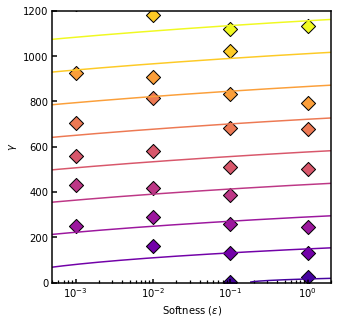

In [19]:
# Let's plot gamma vs. softness
fig = plt.figure(figsize=(5, 5))

# Plot theory at different epsilon
logEps = np.logspace(-5., 2., num=400, base=10)
logPe = np.arange(50, 550, 50)
logST = []
usePhi = 0.65
for j in range(0, len(logPe)):
    logST.append([])
    for i in range(0, len(logEps)):
        logLat = conForRClust(logPe[j], logEps[i])
        logPhiCP = latToPhi(logLat)
        curPLJ = ljPress(logLat, logEps[i])
        curPLJ /= norm
        phiG = compPhiG(logPe[j], logLat)
        cf = clustFrac(usePhi, phiG, logLat)
        Nl = cf * N
        Al = Nl * (np.pi * (logLat**2) * 0.25)
        Rl = np.sqrt(Al / np.pi)
        curST = curPLJ * Rl / l_box[-1]
        logST[j].append(curST)
for i in range(0, len(logPe)):
    plt.plot(logEps, logST[i], c=plt.cm.plasma(logPe[i]/450.), lw=1.5)
        

for i in range(0, len(all_pres)):
    # Plot at constant phi
    if params['phi'][i] != 65:
        continue
    # Don't plot non-phase-separated data
    if all_pres[i].empty:
        continue
    # This data point is a statistical outlier
    if params['peA'][i] == 500 and params['eps'][i] <= 0.0001:
        continue
    
    # Plot simulation data
    y = (all_pres[i]['bulkPress'].iloc[-1]) / (2.*norm) * (avg_rad[i]) / sim_l_box[i]
    # Gather data to compute fit
    plt.scatter(params['eps'][i], y, edgecolor='k', s=100, marker='D',
                c=plt.cm.plasma(params['peA'][i]/450.) )
plt.xscale('log')
plt.xlim(0.5*10**-3, 2*10**0)
plt.ylim(0, 1200)
plt.xlabel(r'Softness $(\epsilon)$')
plt.ylabel(r'$\gamma$')
plt.show()
 

In [20]:
### FIGURES FOR PAPER START HERE ###

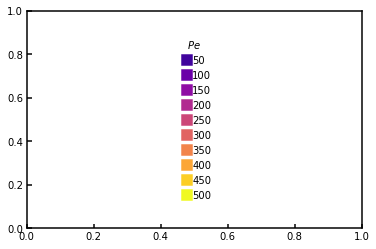

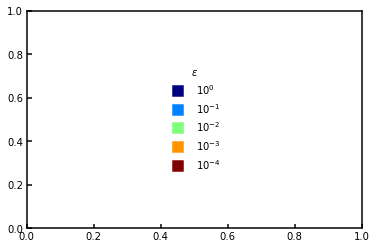

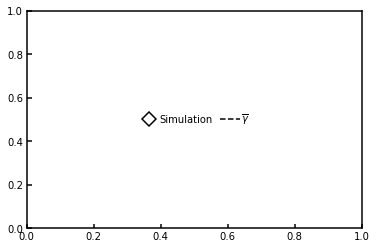

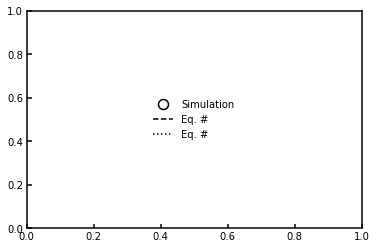

In [83]:
# Legends you may need

# With fill
mk='s'
med = 1.5
msz = 10.
pe_leg = []
myPes = np.arange(50., 550., 50.)
for i in myPes:
    pe_leg.append(Line2D([0], [0], lw=0.,
                         marker=mk, markeredgewidth=med, markeredgecolor=plt.cm.plasma(i/500.),
                         label="{:0.0f}".format(i), markerfacecolor=plt.cm.plasma(i/500.), markersize=msz))


fig, ax = plt.subplots()
ax.legend(title=r'$Pe$', handles=pe_leg, loc='center', fontsize=fsize, frameon=False, handletextpad=-0.45)
plt.show()

# Legend for epsilon
myEps = [0.0001, 0.001, 0.01, 0.1, 1.]
eps_leg = []
for i in range(0, len(myEps)):
    eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
                          markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
                          markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
                          label=r'$10^{{{}}}$'.format(-i), markersize=msz))

fig, ax = plt.subplots()
ax.legend(title=r'$\epsilon$', handles=eps_leg, loc='center', fontsize=fsize, frameon=False)
plt.show()

# Make a simulation vs theory legend
avg_leg = [Line2D([0], [0], lw=0., marker='D', markeredgewidth=med, markeredgecolor='k', label=r'Simulation', markerfacecolor='none', markersize=msz),
           Line2D([0], [0], lw=med, ls='--', c='k', markeredgecolor='none', label=r'$\overline{\gamma}$', markerfacecolor='none', markersize=msz)]


fig, ax = plt.subplots()
ax.legend(handles=avg_leg, loc='center', fontsize=fsize, frameon=False, ncol=2, handletextpad=0.1, columnspacing=0.75)
plt.show()

# Make a simulation vs theory legend
leg_two = [Line2D([0], [0], lw=0., marker='o', markeredgewidth=med, markeredgecolor='k', label=r'Simulation', markerfacecolor='none', markersize=msz),
           Line2D([0], [0], lw=med, c='k', markeredgecolor='none', label=r'Eq. #', markerfacecolor='none', markersize=msz, ls='--'),
           Line2D([0], [0], lw=med, c='k', markeredgecolor='none', label=r'Eq. #', markerfacecolor='none', markersize=msz, ls=':')]


fig, ax = plt.subplots()
ax.legend(handles=leg_two, loc='center', fontsize=fsize, frameon=False)
plt.show()


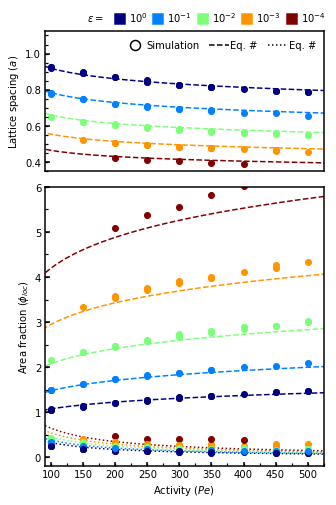

In [22]:
# Set figure size
fig = plt.figure(figsize=(5, 8))
# The parent gridspec
gs = gridspec.GridSpec(2, 1, height_ratios=[1,2], figure=fig)

# A more familiar form
ax = []
ax.append(fig.add_subplot(gs[0]))
ax.append(fig.add_subplot(gs[1]))

for i in range(0, len(epsRange)):
    ax[0].plot(peRange, lat[phiInd][i], c=plt.cm.jet(float(i)/(len(epsRange)-1)),
               lw=1.5, ls='--')
    
# Overlay the simulation data
for i in range(0, len(all_dens)):
    # Don't plot non-phase-separated data
    if all_dens[i][LIQ].iloc[-1] < 0.75:
        continue
    ax[0].scatter(params['peA'][i], phiToLat(all_dens[i][LIQ].iloc[-1]),
                  c=plt.cm.jet(float(epsRange.index(params['eps'][i]))/(len(epsRange)-1)) )

ax[0].set_xlim(90, 525)
ax[0].set_ylim(0.35, 1.0)
ax[0].set_ylim(0.35, r_cut)
ax[0].set_xticks([])
ax[0].set_ylabel(r'Lattice spacing $(a)$')


###############################
### BOTTOM PLOT STARTS HERE ###
###############################

for i in range(0, len(epsRange)):
    ax[1].plot(peRange, phiCPs[phiInd][i], c=plt.cm.jet(float(i)/(len(epsRange)-1)), 
             lw=1.5, ls='--', zorder=0)
    ax[1].plot(peRange, phiGs[phiInd][i], c=plt.cm.jet(float(i)/(len(epsRange)-1)),
             lw=1.5, zorder=0, ls=':')

# Overlay the simulation data
GAS="Gas-r=5.0"
LIQ="Liq-r=5.0"
for i in range(0, len(all_dens)):
    # Don't plot non-phase-separated data
    if all_dens[i][LIQ].iloc[-1] < 0.75:
        continue
    ax[1].scatter(params['peA'][i], all_dens[i][LIQ].iloc[-1],
                c=plt.cm.jet(float(epsRange.index(params['eps'][i]))/(len(epsRange)-1)) )
    ax[1].scatter(params['peA'][i], all_dens[i][GAS].iloc[-1],
            c=plt.cm.jet(float(epsRange.index(params['eps'][i]))/(len(epsRange)-1)) )
    
ax[1].set_xlim(90, 525)
ax[1].set_ylim(-0.2, 6.)
ax[1].set_xlabel(r'Activity $(Pe)$')
ax[1].set_ylabel(r'Area fraction $(\phi_{loc})$')

# Set minor ticks
loc = ticker.MultipleLocator(base=25.)
ax[1].xaxis.set_minor_locator(loc)
loc = ticker.MultipleLocator(base=0.5)
ax[1].yaxis.set_minor_locator(loc)
loc = ticker.MultipleLocator(base=0.05)
ax[0].yaxis.set_minor_locator(loc)

ax[0].text(0.15, 1.075, r'$\epsilon=$',
           transform=ax[0].transAxes,
           fontsize=fsize)
one_leg = ax[0].legend(handles=eps_leg, loc='center',
             columnspacing=0.1, handletextpad=-0.1,
             bbox_transform=ax[0].transAxes, bbox_to_anchor=[0.62, 1.1],
             fontsize=fsize, frameon=False, ncol=5)
ax[0].add_artist(one_leg)

ax[0].legend(handles=leg_two, loc='center',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax[0].transAxes, bbox_to_anchor=[0.63, 0.9],
             fontsize=fsize, frameon=False, ncol=3)

gs.update(hspace=0.075)
plt.savefig('phase_diagrams.pdf', bbox_inches='tight', pad_inches=0.0, dpi=1000)
plt.show()

In [23]:
# I need to load in the radial data for figure 3

In [24]:
# Grab file names from data folder
rads = os.listdir('../radial_data/all_rad')
try:
    rads.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in rads:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
    print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(rads, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_rad = []
os.chdir(parent)
os.chdir('../radial_data/all_rad')
for i in rads:
    print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_rad.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_rad[0])

# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt', 'lat', 'phiG', 'cf', 'Aliq', 'Rliq']
rad_par = pd.DataFrame(columns=headers)
for i in range(0, len(all_rad)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    radlat = conForRClust(pe, ep)
    radPhiG = compPhiG(pe, radlat)
    radcf = clustFrac(phi/100., radPhiG, radlat)
    radNl = radcf * N
    radAl = radNl * (np.pi * (radlat**2) * 0.25)
    radRl = np.sqrt(radAl / np.pi)
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau, lat, radPhiG, radcf, radAl, radRl]], columns=headers)
    rad_par = rad_par.append(df, ignore_index = True)
display(rad_par)

Sorting... 
CoM_cluster_pe200_phi45_eps0.01_align3_dtau1.0e-06.txt
CoM_cluster_pe200_phi45_eps0.1_align3_dtau1.0e-06.txt
CoM_cluster_pe200_phi45_eps1.0_align3_dtau1.0e-06.txt
CoM_cluster_pe350_phi55_eps0.001_align3_dtau1.0e-06.txt
CoM_cluster_pe200_phi55_eps0.001_align3_dtau1.0e-06.txt
CoM_cluster_pe150_phi55_eps0.001_align3_dtau1.0e-06.txt
CoM_cluster_pe250_phi55_eps0.001_align3_dtau1.0e-06.txt
CoM_cluster_pe300_phi55_eps0.001_align3_dtau1.0e-06.txt
CoM_cluster_pe450_phi55_eps0.001_align3_dtau1.0e-06.txt
CoM_cluster_pe500_phi55_eps0.001_align3_dtau1.0e-06.txt
CoM_cluster_pe400_phi55_eps0.001_align3_dtau1.0e-06.txt
CoM_cluster_pe200_phi55_eps0.001_align3_dtau1.0e-06 2.txt
CoM_cluster_pe500_phi55_eps0.01_align3_dtau1.0e-06.txt
CoM_cluster_pe350_phi55_eps0.01_align3_dtau1.0e-06.txt
CoM_cluster_pe300_phi55_eps0.01_align3_dtau1.0e-06.txt
CoM_cluster_pe400_phi55_eps0.01_align3_dtau1.0e-06.txt
CoM_cluster_pe450_phi55_eps0.01_align3_dtau1.0e-06.txt
CoM_cluster_pe250_phi55_eps0.01_align3_dtau1

,rCoM,NinBin,phiLoc,align,pInt,pSwim
0,1.123042,1380,3754.049292,-41.308613,1525411.1,-41.0
1,2.246084,4138,11258.471950,79.640101,4591516.0,-139.5
2,3.369126,6858,18661.004380,-32.367249,7562411.4,-170.1
3,4.492168,9582,26067.374804,-66.474472,10529339.9,-528.0
4,5.615210,12377,33667.884311,35.041892,13627476.7,-846.2
...,...,...,...,...,...,...
366,412.156414,0,0.000000,0.000000,0.0,0.0
367,413.279456,0,0.000000,0.000000,0.0,0.0
368,414.402498,0,0.000000,0.000000,0.0,0.0
369,415.525540,0,0.000000,0.000000,0.0,0.0


,pe,peA,peB,xA,eps,phi,tauPer_dt,lat,phiG,cf,Aliq,Rliq
0,200,0,0,100.0,0.0100,45.0,1.0,"[[[1.12246205, 1.12246205, 1.12246205, 1.12246...",0.244440,0.508322,15012.656595,69.127976
1,200,0,0,100.0,0.1000,45.0,1.0,"[[[1.12246205, 1.12246205, 1.12246205, 1.12246...",0.205569,0.617613,25790.660194,90.605861
2,200,0,0,100.0,1.0000,45.0,1.0,"[[[1.12246205, 1.12246205, 1.12246205, 1.12246...",0.174184,0.714560,41560.850198,115.018388
3,350,0,0,100.0,0.0010,55.0,1.0,"[[[1.12246205, 1.12246205, 1.12246205, 1.12246...",0.175179,0.714489,13415.894735,65.348389
4,200,0,0,100.0,0.0010,55.0,1.0,"[[[1.12246205, 1.12246205, 1.12246205, 1.12246...",0.291410,0.513849,10677.929326,58.300004
...,...,...,...,...,...,...,...,...,...,...,...,...
40,200,0,0,100.0,0.0001,65.0,1.0,"[[[1.12246205, 1.12246205, 1.12246205, 1.12246...",0.347716,0.500729,7308.285472,48.231727
41,200,0,0,100.0,0.0010,65.0,1.0,"[[[1.12246205, 1.12246205, 1.12246205, 1.12246...",0.291410,0.602936,12529.191404,63.151924
42,200,0,0,100.0,0.0100,65.0,1.0,"[[[1.12246205, 1.12246205, 1.12246205, 1.12246...",0.244440,0.694310,20505.611602,80.790710
43,200,0,0,100.0,0.1000,65.0,1.0,"[[[1.12246205, 1.12246205, 1.12246205, 1.12246...",0.205569,0.777435,32464.585977,101.655293


['rCoM', 'NinBin', 'phiLoc', 'align', 'pInt', 'pSwim']


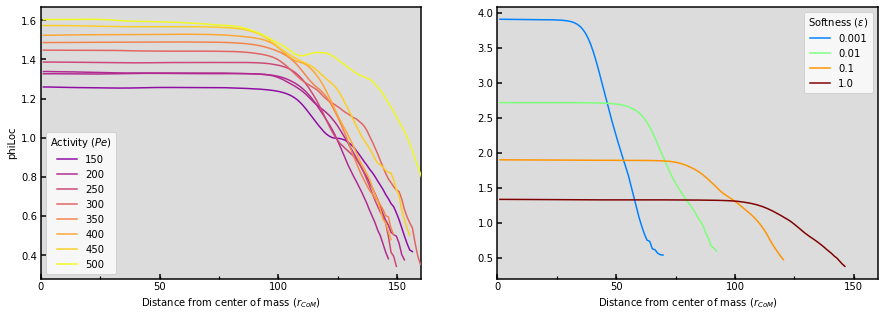

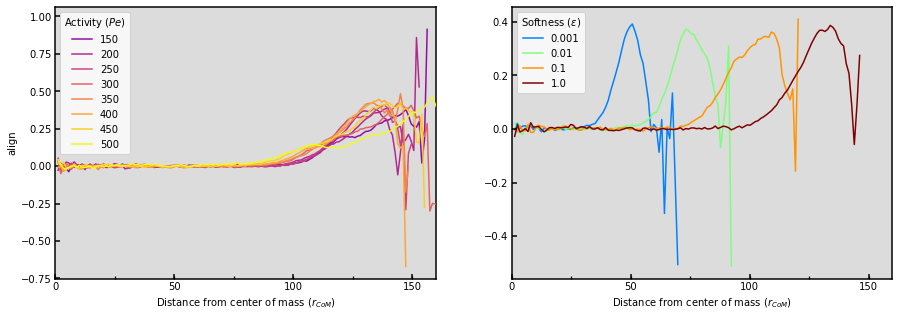

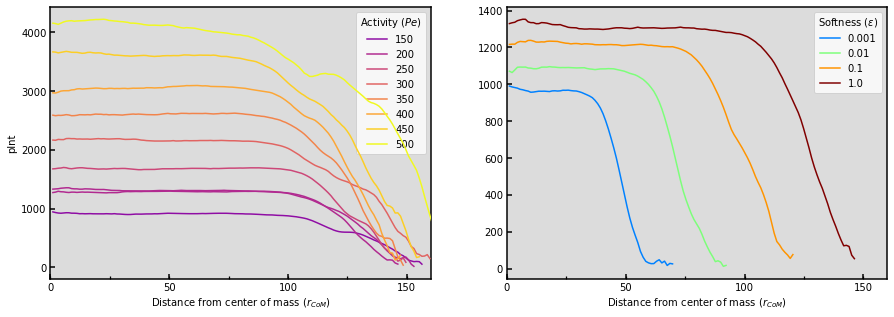

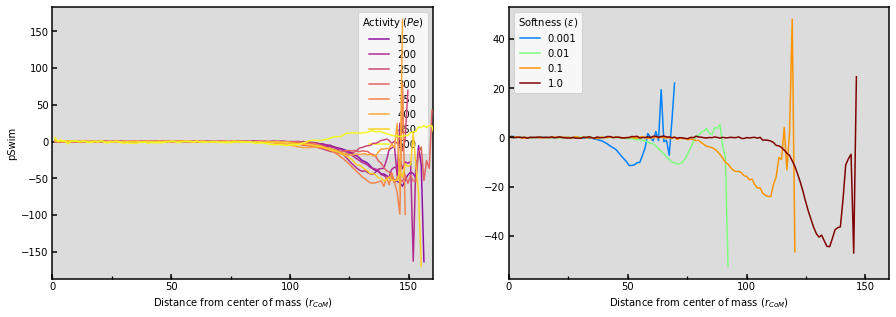

In [25]:
# Plot radial data
headers = list(all_rad[0])
print(headers)

for z in range(2, len(headers)):

    # Let's plot all of these things together
    fig = plt.figure(figsize=(15, 5))
    gs = plt.GridSpec(1, 2, wspace=0.1, hspace=0.2)
    ax = []
    ax.append(plt.subplot(gs[0, 0]))
    ax.append(plt.subplot(gs[0, 1]))

    name = headers[z]

    # Plot upper left: varied Pe
    for i in range(0, len(all_rad)):
        if rad_par['eps'][i] == 1. and rad_par['pe'][i] > 100 and rad_par['phi'][i] == 55:
            ax[0].plot(all_rad[i]['rCoM'], all_rad[i][name] / all_rad[i]['NinBin'],
                       c=plt.cm.plasma(rad_par['pe'][i]/500.), lw=1.5,
                       label=int(rad_par['pe'][i]), zorder=rad_par['pe'][i])

    handles, labels = ax[0].get_legend_handles_labels()
    for i in range(0, len(labels)):
        for j in range(0, len(labels)):
            if labels[j] < labels[i] and j > i:
                labels[i], labels[j] = labels[j], labels[i]
                handles[i], handles[j] = handles[j], handles[i]
    by_label = OrderedDict(zip(labels, handles))
    ax[0].legend(by_label.values(), by_label.keys(), title=r'Activity $(Pe)$')

    # Plot upper right: varied ep
    repeat_eps = []
    for i in range(0, len(all_rad)):
        if rad_par['pe'][i] == 200. and rad_par['phi'][i] == 55 and rad_par['eps'][i] > 0.0001:
            if rad_par['eps'][i] in repeat_eps:
                continue
            repeat_eps.append(rad_par['eps'][i])
            ax[1].plot(all_rad[i]['rCoM'], all_rad[i][name] / all_rad[i]['NinBin'],
                       c=plt.cm.jet((np.log10(rad_par['eps'][i])+4.)/4.), lw=1.5,
                       label=rad_par['eps'][i], zorder=rad_par['eps'][i])

    handles, labels = ax[1].get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax[1].legend(by_label.values(), by_label.keys(), title=r'Softness $(\epsilon)$')
    ax[0].set_ylabel(name)
    for i in range(0, len(ax)):
        ax[i].set_xlim(0,160)
        ax[i].set_xlabel(r'Distance from center of mass $(r_{CoM})$')
        # Set the x and y minor ticks
        loc = ticker.MultipleLocator(base=50.)
        ax[i].xaxis.set_major_locator(loc)
        loc = ticker.MultipleLocator(base=25.)
        ax[i].xaxis.set_minor_locator(loc)
        # Tick width and height
        ax[i].xaxis.set_tick_params(width=1.5, size=5.)
        ax[i].yaxis.set_tick_params(width=1.5, size=5.)
        ax[i].xaxis.set_tick_params(which='minor', width=1.25, size=3.)
        ax[i].yaxis.set_tick_params(which='minor', width=1.25, size=3.)
        ax[i].set_facecolor('#DCDCDC')

    gs.update(wspace=0.2)
#     plt.savefig(name + '_comparison.pdf', dpi=200)
    plt.show()
    plt.close()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


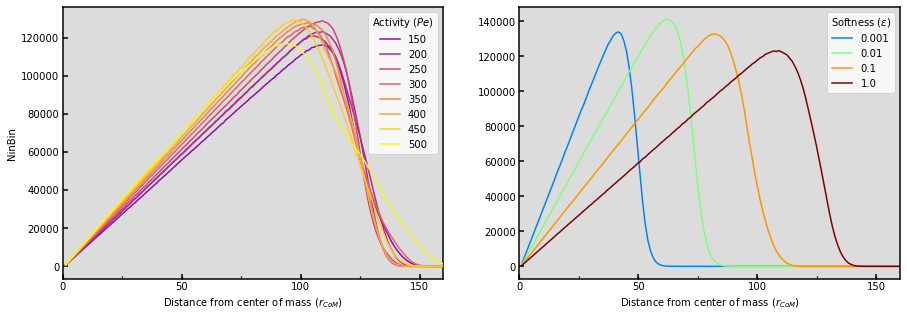

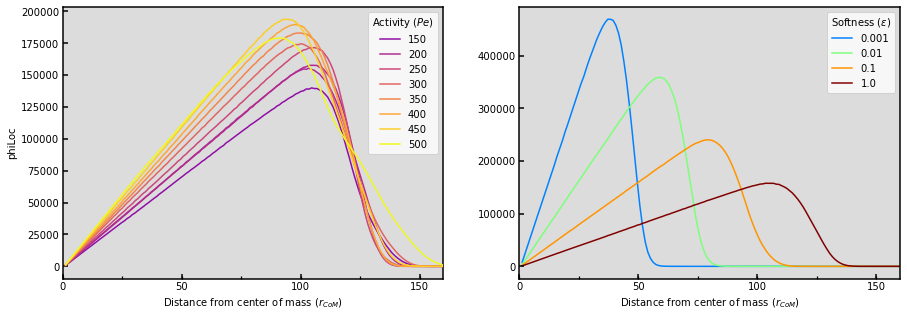

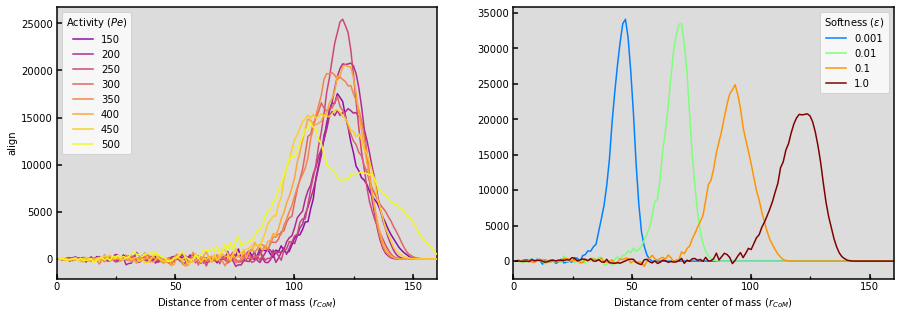

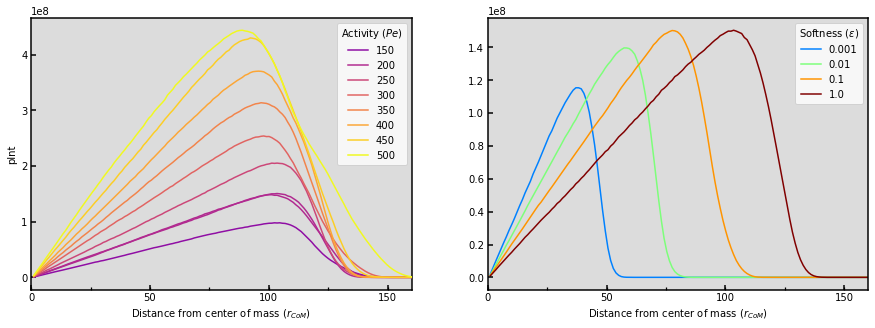

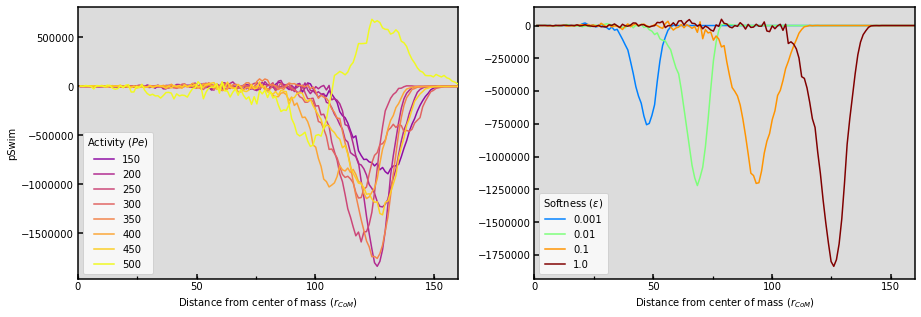

In [26]:
# We can also ignore bins that have an insufficient number of particles
for z in range(1, len(headers)):

    # Let's plot all of these things together
    fig = plt.figure(figsize=(15, 5))
    gs = plt.GridSpec(1, 2, wspace=0.1, hspace=0.2)
    ax = []
    ax.append(plt.subplot(gs[0, 0]))
    ax.append(plt.subplot(gs[0, 1]))

    name = headers[z]

    # Plot upper left: varied Pe
    for i in range(0, len(all_rad)):
        if rad_par['eps'][i] == 1. and rad_par['pe'][i] > 100 and rad_par['phi'][i] == 55:
            ax[0].plot(all_rad[i]['rCoM'], all_rad[i][name],
                       c=plt.cm.plasma(rad_par['pe'][i]/500.), lw=1.5,
                       label=int(rad_par['pe'][i]), zorder=rad_par['pe'][i])

    handles, labels = ax[0].get_legend_handles_labels()
    for i in range(0, len(labels)):
        for j in range(0, len(labels)):
            if labels[j] < labels[i] and j > i:
                labels[i], labels[j] = labels[j], labels[i]
                handles[i], handles[j] = handles[j], handles[i]
    by_label = OrderedDict(zip(labels, handles))
    ax[0].legend(by_label.values(), by_label.keys(), title=r'Activity $(Pe)$')

    # Plot upper right: varied ep
    repeat_eps = []
    for i in range(0, len(all_rad)):
        if rad_par['pe'][i] == 200. and rad_par['phi'][i] == 55 and rad_par['eps'][i] > 0.0001:
            if rad_par['eps'][i] in repeat_eps:
                continue
            repeat_eps.append(rad_par['eps'][i])
            ax[1].plot(all_rad[i]['rCoM'], all_rad[i][name],
                       c=plt.cm.jet((np.log10(rad_par['eps'][i])+4.)/4.), lw=1.5,
                       label=rad_par['eps'][i], zorder=rad_par['eps'][i])

    handles, labels = ax[1].get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax[1].legend(by_label.values(), by_label.keys(), title=r'Softness $(\epsilon)$')



    ax[0].set_ylabel(name)
    for i in range(0, len(ax)):
        ax[i].set_xlim(0,160)
        ax[i].set_xlabel(r'Distance from center of mass $(r_{CoM})$')
        # Set the x and y minor ticks
        loc = ticker.MultipleLocator(base=50.)
        ax[i].xaxis.set_major_locator(loc)
        loc = ticker.MultipleLocator(base=25.)
        ax[i].xaxis.set_minor_locator(loc)
        # Tick width and height
        ax[i].xaxis.set_tick_params(width=1.5, size=5.)
        ax[i].yaxis.set_tick_params(width=1.5, size=5.)
        ax[i].xaxis.set_tick_params(which='minor', width=1.25, size=3.)
        ax[i].yaxis.set_tick_params(which='minor', width=1.25, size=3.)
        ax[i].set_facecolor('#DCDCDC')

    gs.update(wspace=0.2)
    plt.tight_layout()
#     plt.savefig(name + '_comparison_no_avg.pdf', dpi=200)
    plt.show()
    plt.close()

In [27]:
# Get rid of the ugly bins (r>25 and n<10000)
headers = list(all_rad[0])
del headers[0]
del headers[0]
print(headers)

minN = 500

min_rad = []
for i in range(0, len(all_rad)):
    min_rad.append(all_rad[i].copy(deep=True))
    for j in headers:
        min_rad[-1].loc[(min_rad[-1]['NinBin'] < minN) & (min_rad[-1]['rCoM'] > 25), j] = 0
# display(all_rad[0])
# display(min_rad[0])

['phiLoc', 'align', 'pInt', 'pSwim']


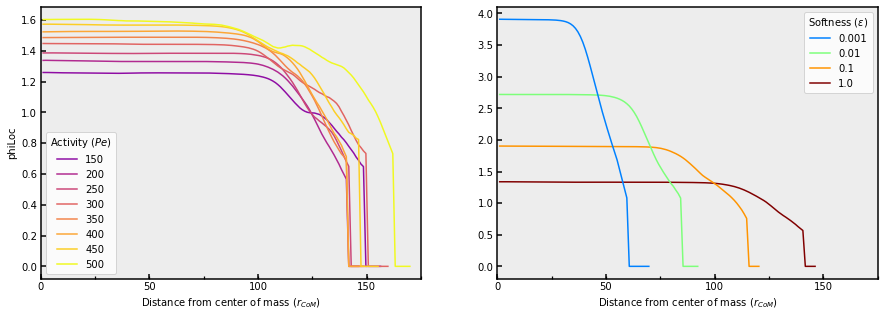

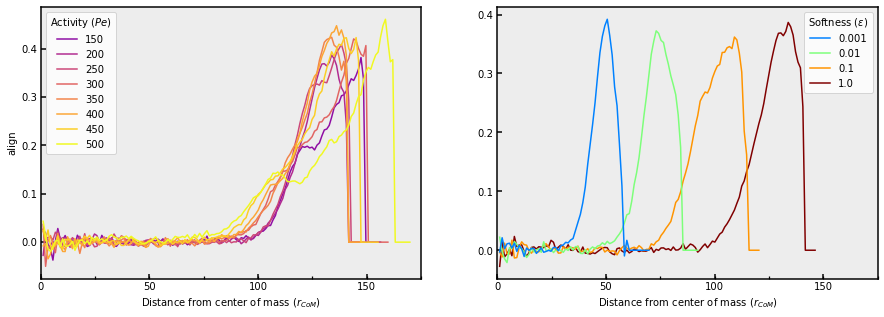

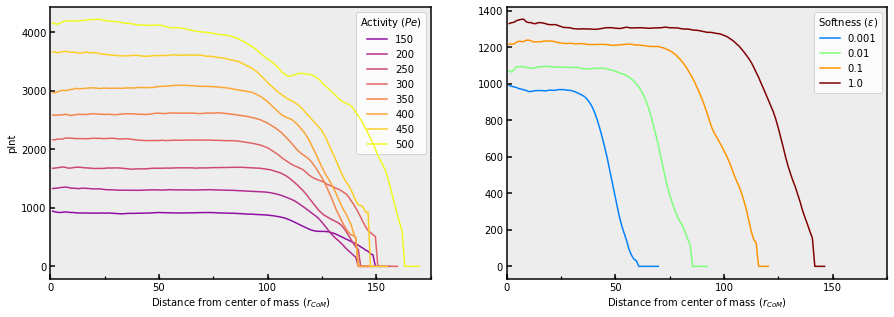

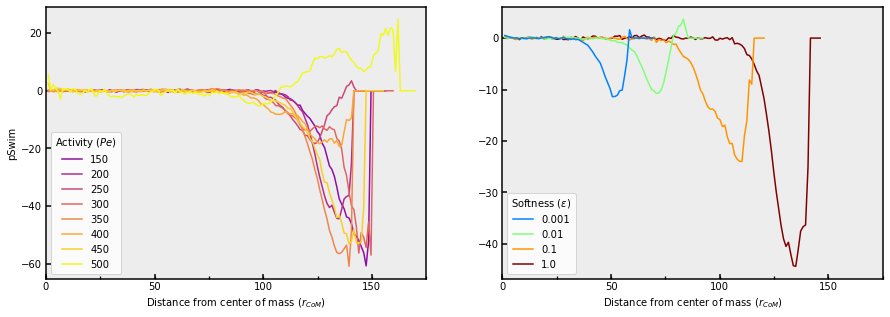

In [28]:
headers = list(min_rad[0])
for z in range(2, len(headers)):

    # Let's plot all of these things together
    fig = plt.figure(figsize=(15, 5))
    gs = plt.GridSpec(1, 2, wspace=0.1, hspace=0.2)
    ax = []
    ax.append(plt.subplot(gs[0, 0]))
    ax.append(plt.subplot(gs[0, 1]))

    name = headers[z]

    # Plot upper left: varied Pe
    repeat_pe = []
    for i in range(0, len(min_rad)):
        if rad_par['eps'][i] == 1. and 100 < rad_par['pe'][i] < 550 and rad_par['phi'][i] == 55:
            if rad_par['pe'][i] in repeat_pe:
                continue
            repeat_pe.append(rad_par['pe'][i])
            ax[0].plot(min_rad[i]['rCoM'], min_rad[i][name] / min_rad[i]['NinBin'],
                       c=plt.cm.plasma(rad_par['pe'][i]/500.), lw=1.5,
                       label=int(rad_par['pe'][i]), zorder=rad_par['pe'][i])

    handles, labels = ax[0].get_legend_handles_labels()
    for i in range(0, len(labels)):
        for j in range(0, len(labels)):
            if labels[j] < labels[i] and j > i:
                labels[i], labels[j] = labels[j], labels[i]
                handles[i], handles[j] = handles[j], handles[i]
    by_label = OrderedDict(zip(labels, handles))
    ax[0].legend(by_label.values(), by_label.keys(), title=r'Activity $(Pe)$')

    # Plot upper right: varied ep
    repeat_eps = []
    for i in range(0, len(min_rad)):
        if rad_par['pe'][i] == 200. and rad_par['phi'][i] == 55 and rad_par['eps'][i] > -0.0001:
            if rad_par['eps'][i] in repeat_eps:
                continue
            repeat_eps.append(rad_par['eps'][i])
            ax[1].plot(min_rad[i]['rCoM'], min_rad[i][name] / min_rad[i]['NinBin'],
                       c=plt.cm.jet((np.log10(rad_par['eps'][i])+4.)/4.), lw=1.5,
                       label=rad_par['eps'][i],
                       zorder=-np.log10(rad_par['eps'][i]))

    handles, labels = ax[1].get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax[1].legend(by_label.values(), by_label.keys(), title=r'Softness $(\epsilon)$')



    ax[0].set_ylabel(name)
    for i in range(0, len(ax)):
        ax[i].set_xlim(0,175)
        ax[i].set_xlabel(r'Distance from center of mass $(r_{CoM})$')
        # Set the x and y minor ticks
        loc = ticker.MultipleLocator(base=50.)
        ax[i].xaxis.set_major_locator(loc)
        loc = ticker.MultipleLocator(base=25.)
        ax[i].xaxis.set_minor_locator(loc)
        # Tick width and height
        ax[i].xaxis.set_tick_params(width=1.5, size=5.)
        ax[i].yaxis.set_tick_params(width=1.5, size=5.)
        ax[i].xaxis.set_tick_params(which='minor', width=1.25, size=3.)
        ax[i].yaxis.set_tick_params(which='minor', width=1.25, size=3.)
        ax[i].set_facecolor('#ededed')

    gs.update(wspace=0.2)
#     plt.savefig(name + '_comparison_avg_min_n.pdf', dpi=200)
    plt.show()
    plt.close()

['phiLoc', 'align', 'pInt']


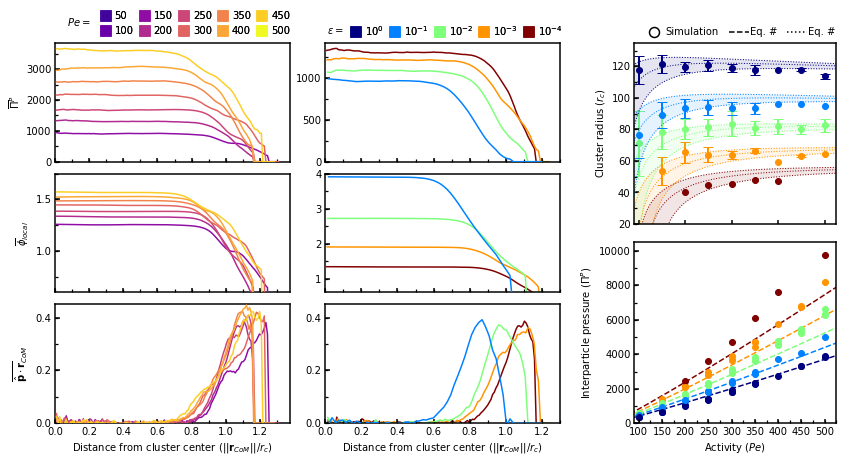

In [89]:
# Okay, let's make the figure


# Need a nested gridspec
fig = plt.figure(figsize=(14, 7))
# # The parent gridspec (2 columns)
# pgs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[0.75, 0.75, 0.5], wspace=0.2)
# # The left gridspec (3 rows)
# lgs = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=pgs[0])
# # The center gridspec (3 rows)
# cgs = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=pgs[1])
# # The right gridspec (2 rows)
# rgs = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=pgs[2])

# # Radial data (color by Pe)
# ax.append(fig.add_subplot(lgs[0]))
# ax.append(fig.add_subplot(lgs[1]))
# ax.append(fig.add_subplot(lgs[2]))
# # Radial data (color by epsilon)
# ax.append(fig.add_subplot(cgs[0]))
# ax.append(fig.add_subplot(cgs[1]))
# ax.append(fig.add_subplot(cgs[2]))
# # Plots
# ax.append(fig.add_subplot(rgs[0]))
# ax.append(fig.add_subplot(rgs[1]))

# Parent gs
pgs = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[2.5, 1], wspace=0.21)
# Radial data gs
radgs = gridspec.GridSpecFromSubplotSpec(3, 2, subplot_spec=pgs[0], wspace=0.15, hspace=0.1)
# Plot gs
rgs = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=pgs[1], hspace=0.1)


# Axes to hold each plot
ax = []
# Radial data (color by Pe)
ax.append(fig.add_subplot(radgs[0, 0]))
ax.append(fig.add_subplot(radgs[1, 0]))
ax.append(fig.add_subplot(radgs[2, 0]))
# Radial data (color by epsilon)
ax.append(fig.add_subplot(radgs[0, 1]))
ax.append(fig.add_subplot(radgs[1, 1]))
ax.append(fig.add_subplot(radgs[2, 1]))
# Plots
ax.append(fig.add_subplot(rgs[0]))
ax.append(fig.add_subplot(rgs[1]))

# Get indices of all my axes (in case I change things)
lt = 0    # Left top
lm = 1    # Left middle
lb = 2    # Left bottom
ct = 3    # Center top
cm = 4    # Center middle
cb = 5    # Center bottom
rt = 6    # Right top
rb = 7    # Right bottom

# Get rid of unnecessary 
# ax[lt].set_xticks([])
# ax[lm].set_xticks([])
# ax[ct].set_xticks([])
# ax[cm].set_xticks([])
# ax[rt].set_xticks([])

ax[lt].set_xticklabels([])
ax[lm].set_xticklabels([])
ax[ct].set_xticklabels([])
ax[cm].set_xticklabels([])
ax[rt].set_xticklabels([])

# Get the quantities you want to plot
headers = list(min_rad[0])
del headers[5]
del headers[1]
del headers[0]
print(headers)

# Left bottom plot is alignment
repeat_pe = []
name = headers[1]
for i in range(0, len(min_rad)):
    if rad_par['eps'][i] == 1. and 100 < rad_par['pe'][i] < 500 and rad_par['phi'][i] == 55:
        if rad_par['pe'][i] in repeat_pe:
            continue
        repeat_pe.append(rad_par['pe'][i])
        ax[lb].plot(min_rad[i]['rCoM'] / rad_par['Rliq'][i], min_rad[i][name] / min_rad[i]['NinBin'],
                   c=plt.cm.plasma(rad_par['pe'][i]/500.), lw=1.5,
                   label=int(rad_par['pe'][i]), zorder=rad_par['pe'][i])
        
# Left middle plot is phi
repeat_pe = []
name = headers[0]
for i in range(0, len(min_rad)):
    if rad_par['eps'][i] == 1. and 100 < rad_par['pe'][i] < 500 and rad_par['phi'][i] == 55:
        if rad_par['pe'][i] in repeat_pe:
            continue
        repeat_pe.append(rad_par['pe'][i])
        ax[lm].plot(min_rad[i]['rCoM'] / rad_par['Rliq'][i], min_rad[i][name] / min_rad[i]['NinBin'],
                   c=plt.cm.plasma(rad_par['pe'][i]/500.), lw=1.5,
                   label=int(rad_par['pe'][i]), zorder=rad_par['pe'][i])
        
# Left top plot is phi
repeat_pe = []
name = headers[2]
for i in range(0, len(min_rad)):
    if rad_par['eps'][i] == 1. and 100 < rad_par['pe'][i] < 500 and rad_par['phi'][i] == 55:
        if rad_par['pe'][i] in repeat_pe:
            continue
        repeat_pe.append(rad_par['pe'][i])
        ax[lt].plot(min_rad[i]['rCoM'] / rad_par['Rliq'][i], min_rad[i][name] / min_rad[i]['NinBin'],
                   c=plt.cm.plasma(rad_par['pe'][i]/500.), lw=1.5,
                   label=int(rad_par['pe'][i]), zorder=rad_par['pe'][i])

# Center bottom plot is alignment
repeat_eps = []
name = headers[1]
for i in range(0, len(min_rad)):
    if rad_par['pe'][i] == 200. and rad_par['phi'][i] == 55 and rad_par['eps'][i] > -0.0001:
        if rad_par['eps'][i] in repeat_eps:
            continue
        repeat_eps.append(rad_par['eps'][i])
        ax[cb].plot(min_rad[i]['rCoM'] / rad_par['Rliq'][i], min_rad[i][name] / min_rad[i]['NinBin'],
                   c=plt.cm.jet((np.log10(rad_par['eps'][i])+4.)/4.), lw=1.5,
                   label=rad_par['eps'][i],
                   zorder=-np.log10(rad_par['eps'][i]))     
        
# Center bottom plot is alignment
repeat_eps = []
name = headers[0]
for i in range(0, len(min_rad)):
    if rad_par['pe'][i] == 200. and rad_par['phi'][i] == 55 and rad_par['eps'][i] > -0.0001:
        if rad_par['eps'][i] in repeat_eps:
            continue
        repeat_eps.append(rad_par['eps'][i])
        ax[cm].plot(min_rad[i]['rCoM'] / rad_par['Rliq'][i], min_rad[i][name] / min_rad[i]['NinBin'],
                   c=plt.cm.jet((np.log10(rad_par['eps'][i])+4.)/4.), lw=1.5,
                   label=rad_par['eps'][i],
                   zorder=-np.log10(rad_par['eps'][i]))  
        
# Center bottom plot is alignment
repeat_eps = []
name = headers[2]
for i in range(0, len(min_rad)):
    if rad_par['pe'][i] == 200. and rad_par['phi'][i] == 55 and rad_par['eps'][i] > -0.0001:
        if rad_par['eps'][i] in repeat_eps:
            continue
        repeat_eps.append(rad_par['eps'][i])
        ax[ct].plot(min_rad[i]['rCoM'] / rad_par['Rliq'][i], min_rad[i][name] / min_rad[i]['NinBin'],
                   c=plt.cm.jet((np.log10(rad_par['eps'][i])+4.)/4.), lw=1.5,
                   label=rad_par['eps'][i],
                   zorder=-np.log10(rad_par['eps'][i]))  
            
# x limits
ax[lb].set_xlim(0.,)        
ax[lm].set_xlim(0.,)
ax[lt].set_xlim(0.,)
ax[cb].set_xlim(0.,)        
ax[cm].set_xlim(0.,)
ax[ct].set_xlim(0.,)
# y limits
ax[lb].set_ylim(0., 0.45)        
ax[lm].set_ylim(0.6, 1.75)
ax[lt].set_ylim(0.,)
ax[cb].set_ylim(0., 0.45)        
ax[cm].set_ylim(0.6, 4)
ax[ct].set_ylim(0.,)

ax[lb].set_xlabel(r'Distance from cluster center' + r' $\left(||\mathbf{r}_{CoM}||/r_{c}\right)$')
ax[cb].set_xlabel(r'Distance from cluster center' + r' $\left(||\mathbf{r}_{CoM}||/r_{c}\right)$')

ax[lb].set_ylabel(r'$\overline{\hat{\bf{p}}\cdot\mathbf{r}}_{CoM}$')
ax[lm].set_ylabel(r'$\overline{\phi}_{local}$')
ax[lt].set_ylabel(r'$\overline{\Pi}^{P}$')

# Set all the x ticks for radial plots
loc = ticker.MultipleLocator(base=0.2)
ax[lb].xaxis.set_major_locator(loc)
ax[cb].xaxis.set_major_locator(loc)
ax[lm].xaxis.set_major_locator(loc)
ax[cm].xaxis.set_major_locator(loc)
ax[lt].xaxis.set_major_locator(loc)
ax[ct].xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=0.1)
ax[lb].xaxis.set_minor_locator(loc)
ax[cb].xaxis.set_minor_locator(loc)
ax[lm].xaxis.set_minor_locator(loc)
ax[cm].xaxis.set_minor_locator(loc)
ax[lt].xaxis.set_minor_locator(loc)
ax[ct].xaxis.set_minor_locator(loc)


# Set y ticks
loc = ticker.MultipleLocator(base=0.2)
ax[lb].yaxis.set_major_locator(loc)
ax[cb].yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=0.1)
ax[lb].yaxis.set_minor_locator(loc)
ax[cb].yaxis.set_minor_locator(loc)
# Left middle plot
loc = ticker.MultipleLocator(base=0.5)
ax[lm].yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=0.25)
ax[lm].yaxis.set_minor_locator(loc)
# Center middle plot
loc = ticker.MultipleLocator(base=1.)
ax[cm].yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=0.5)
ax[cm].yaxis.set_minor_locator(loc)
# Left top plot
loc = ticker.MultipleLocator(base=1000)
ax[lt].yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=500)
ax[lt].yaxis.set_minor_locator(loc)
# Center top plot
loc = ticker.MultipleLocator(base=500)
ax[ct].yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=250)
ax[ct].yaxis.set_minor_locator(loc)

# ax[i].set_facecolor('#ededed')

########################################################################
########################### END RADIAL PLOTS ###########################
########################################################################

for i in range(0, len(epsRange)):
    for j in range(0, len(constPes)):
        ax[rt].scatter(constPes[j], avgR[i][j], c=plt.cm.jet(float(i)/(len(epsRange)-1)))
        if nForR[i][j] >= 2:
#             if epsRange[i] == 0.0001:
#                 continue
            ax[rt].errorbar(constPes[j], avgR[i][j], stdDev[i][j], zorder=0,
                         c=plt.cm.jet(float(i)/(len(epsRange)-1)),
                         capsize=5, elinewidth=2.)
# Analytical overlay
phiLS = ['--', ':', '-.']
for c in range(0, len(phiRange)):
    for i in range(0, len(epsRange)):
        ax[rt].plot(peRange, Rls[c][i],
                 c=plt.cm.jet(float(i)/(len(epsRange)-1)),
                 ls=':', lw=1.)
fillPhi = [0.45, 0.65]
for i in range(0, len(epsRange)):
    ax[rt].fill_between(peRange, Rls[0][i], Rls[2][i],
                     color=plt.cm.jet(float(i)/(len(epsRange)-1)),
                     linestyle=':', lw=1., alpha=0.1)
ax[rt].set_xlim(90, 525)
ax[rt].set_ylim(20, 135)
# ax[rt].set_xlabel(r'Activity $(Pe)$')
ax[rt].set_ylabel(r'Cluster radius $(r_{c})$')
# Set ticks for right top plot
loc = ticker.MultipleLocator(base=20)
ax[rt].yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=10)
ax[rt].yaxis.set_minor_locator(loc)

### Final plot: pressure ###
for i in range(0, len(epsRange)):
    ax[rb].plot(peRange, pLJ[phiInd][i], c=plt.cm.jet(float(i)/(len(epsRange)-1)),
             lw=1.5, ls='--', zorder=0)
# Overlay the simulation pressure data
for i in range(0, len(all_pres)):
    # Don't plot non-phase-separated data
    if all_pres[i].empty:
        continue
    ax[rb].scatter(params['peA'][i], all_pres[i]['bulkPress'] / (2.*norm), zorder=1,
                c=plt.cm.jet(float(epsRange.index(params['eps'][i]))/(len(epsRange)-1)) )
ax[rb].set_xlim(90, 525)
ax[rb].set_ylim(0, 10500)
ax[rb].set_xlabel(r'Activity $(Pe)$')
ax[rb].set_ylabel(r'Interparticle pressure $(\Pi^{P})$')

# Set ticks for right bottom plot
loc = ticker.MultipleLocator(base=50)
ax[rb].xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=25)
ax[rb].xaxis.set_minor_locator(loc)

loc = ticker.MultipleLocator(base=2000)
ax[rb].yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=1000)
ax[rb].yaxis.set_minor_locator(loc)

# Add all legends

# Activity legend
ax[lt].text(0.05, 1.144, r'$Pe=$',
           transform=ax[lt].transAxes,
           fontsize=fsize)
one_leg = ax[lt].legend(handles=pe_leg, loc='lower right',
             columnspacing=0.1, handletextpad=-0.1,
             bbox_transform=ax[lt].transAxes, bbox_to_anchor=[1.04, 0.98],
             fontsize=fsize, frameon=False, ncol=5)
ax[lt].add_artist(one_leg)

# Epsilon legend
ax[ct].text(0.01, 1.075, r'$\epsilon=$',
           transform=ax[ct].transAxes,
           fontsize=fsize)
one_leg = ax[ct].legend(handles=eps_leg, loc='center',
             columnspacing=0.1, handletextpad=-0.1,
             bbox_transform=ax[ct].transAxes, bbox_to_anchor=[0.55, 1.1],
             fontsize=fsize, frameon=False, ncol=5)
ax[ct].add_artist(one_leg)
# Simulation and theory legend
ax[rt].legend(handles=leg_two, loc='lower right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax[rt].transAxes, bbox_to_anchor=[1.04, 0.98],
             fontsize=fsize, frameon=False, ncol=3)

plt.tight_layout()
plt.savefig('radial_figure.pdf', bbox_inches='tight', pad_inches=0.02, dpi=1000)
plt.show()
plt.close()
